$$ \frac{d^2x}{dt^2} = -\omega^2 x $$
Se considerarmos que:
$$ \frac{dx}{dt} = v \,\, , \quad  \frac{dv}{dt} = -\omega^2 x$$
Então obtemos que:
$$ \frac{d^2x}{dt^2} = \frac{dv}{dt} = -\omega^2 x $$

#### Van der Pol
$$ \frac{d^2x}{dt^2} - \mu(1-x^2)\frac{dx}{dt} + \omega^2x = 0 $$
Portanto:
$$ v = \frac{dx}{dt} \quad  \Longrightarrow \quad \frac{dv}{dt} - \mu(1-x^2)v + \omega^2x = 0  $$
Assim,
$$  \frac{dv}{dt} = \mu(1-x^2)v - \omega^2x \,\, , \quad \frac{dx}{dt} = v$$

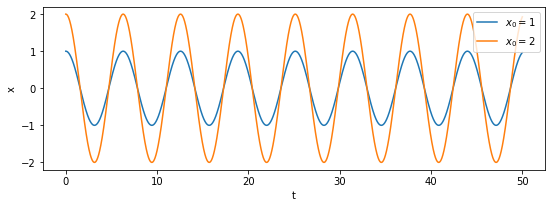

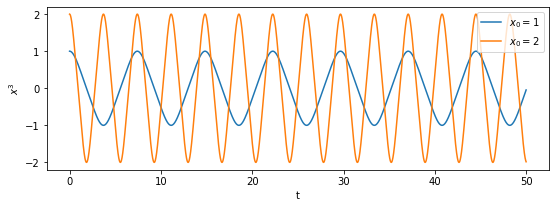

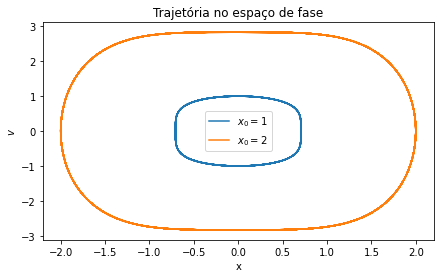

------------------------------Van der Pol ------------------------------


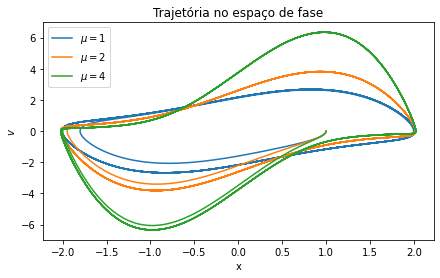

In [1]:
import numpy as np
import matplotlib.pyplot as plt

omega = 1
t0 = 0
tf = 50
N = 10000
h = (tf - t0) / N
tPontos = np.arange(t0,tf,h)

def f(r,t):
        x = r[0]
        v = r[1]
        fx = v
        fv = - omega**2 * x
        return np.array([fx , fv ], float)

def f2(r,t):
    x = r[0]
    v = r[1]
    fx = v
    fv = - omega**2 * x**3
    return np.array([fx , fv ], float)

def aTuaMae(função,x0,v0):
    
    xPontos = []
    vPontos = []
    r = np.array([x0,v0],float)
    for t in tPontos:
        xPontos.append(r[0])
        vPontos.append(r[1])
        k1 = h * função(r, t)
        k2 = h * função(r + 0.5*k1, t+0.5*h)
        k3 = h * função(r + 0.5*k2, t+0.5*h)
        k4 = h * função(r + k3, t+h)
        r += (k1 + 2*k2 + 2*k3 + k4) /6 
    
    return xPontos , vPontos 
    
plt.figure(figsize = (9,3))
plt.plot(tPontos,aTuaMae(f,1,0)[0],label = "$x_0 = 1$")
plt.plot(tPontos,aTuaMae(f,2,0)[0],label = "$x_0 = 2$")
plt.legend()
plt.xlabel("t")
plt.ylabel("x")
plt.show()

plt.figure(figsize = (9,3))
plt.plot(tPontos,aTuaMae(f2,1,0)[0],label = "$x_0 = 1$")
plt.plot(tPontos,aTuaMae(f2,2,0)[0],label = "$x_0 = 2$")
plt.legend()
plt.xlabel("t")
plt.ylabel("$x^3$")
plt.show()

x1,v1 = aTuaMae(f2,1,0)
x2,v2 = aTuaMae(f2,2,0)
plt.figure(figsize = (7,4))
plt.plot(v1,x1,label = "$x_0 = 1$")
plt.plot(x2,v2,label = "$x_0 = 2$")
plt.title("Trajetória no espaço de fase")
plt.legend()
plt.xlabel("x")
plt.ylabel("$v$")
plt.show()

############### Van der Pol ##################
print("------------------------------Van der Pol ------------------------------")

tf2 = 20
h2 = (tf2 - t0)/N
tPontos2 = np.arange(t0,tf2,h2)
def f3(r,t,miu):
        x = r[0]
        v = r[1]
        fx = v
        fv = miu*(1 - x**2)*v - omega**2 * x
        return np.array([fx , fv ], float)

def aMinhaMae(função,x0,v0,miu):
    
    xPontos = []
    vPontos = []
    r = np.array([x0,v0],float)
    for t in tPontos:
        xPontos.append(r[0])
        vPontos.append(r[1])
        k1 = h * função(r, t, miu)
        k2 = h * função(r + 0.5*k1, t+0.5*h, miu)
        k3 = h * função(r + 0.5*k2, t+0.5*h, miu)
        k4 = h * função(r + k3, t+h, miu)
        r += (k1 + 2*k2 + 2*k3 + k4) /6 
    
    return xPontos , vPontos 

x_miu1,v_miu1 = aMinhaMae(f3,1,0,1)
x_miu2,v_miu2 = aMinhaMae(f3,1,0,2)
x_miu4,v_miu4 = aMinhaMae(f3,1,0,4)

plt.figure(figsize = (7,4))
plt.plot(x_miu1,v_miu1,label = "$\mu = 1$")
plt.plot(x_miu2,v_miu2,label = "$\mu = 2$")
plt.plot(x_miu4,v_miu4,label = "$\mu = 4$")
plt.title("Trajetória no espaço de fase")
plt.legend()
plt.xlabel("x")
plt.ylabel("$v$")
plt.show()